# Unsupervised learning

## Clustering

* 데이터에서 비슷한 객체들을 하나의 그룹으로 묶는 것
* 유사도(거리) 정보 기반

### K-means clustering

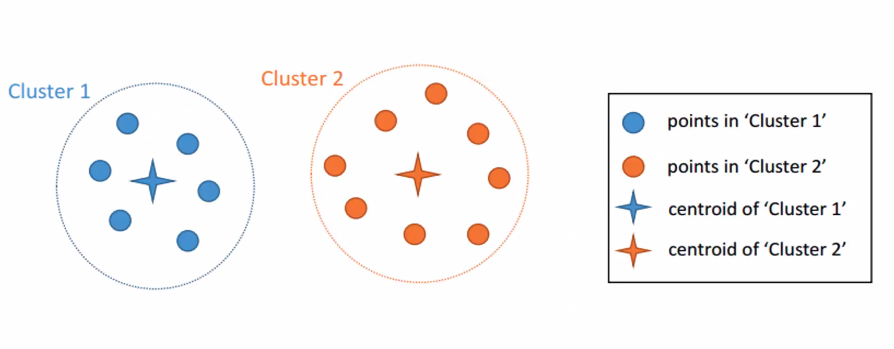

유사도 
 * 유클리디안 거리(L2 Distance) - 두 점사이의 직선거리

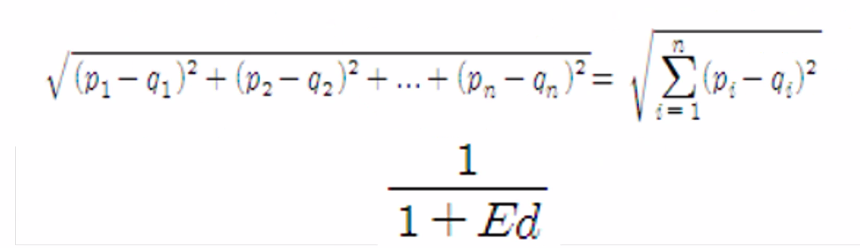

* 코사인 유사도 (자연어 처리에 많이 쓰임)
 * 두 벡터 사이의 코사인 각도를 구해 서로의 유사도를 구하는 방식
 * 텍스트 데이터의 유사도를 구하는 방법 중 하나
 * 데이터 셋의 길이 차이가 심한 상황일 때도 데이터들의 유사도를 판단 할 수 있다.

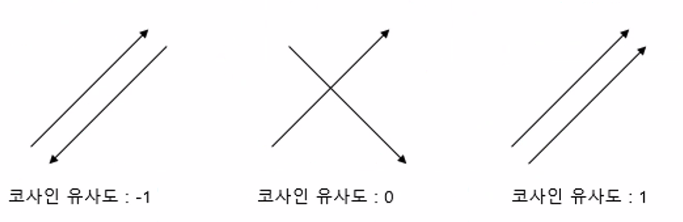

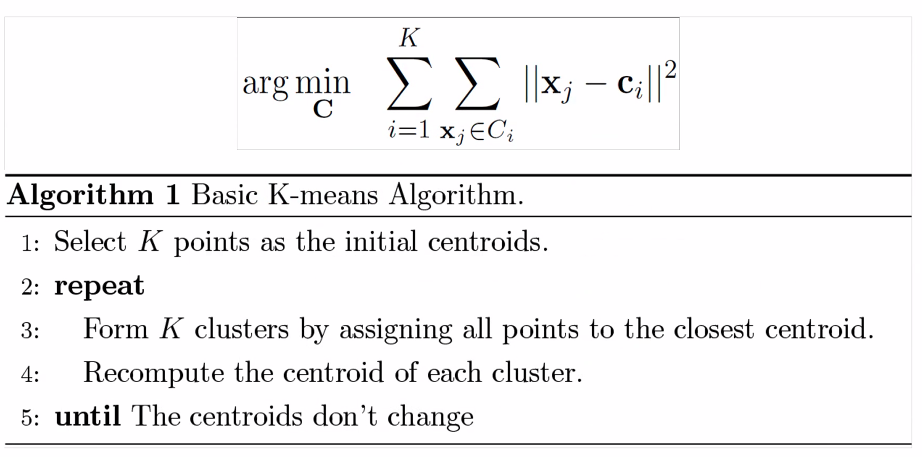

* 단점
 * 초기 포인트에 민감
 * 동그라미 모양 군집으로만 형성
 * 노이즈 포인트에 민감 (동떨어진 데이터에 따라 군집이 크게 변화)

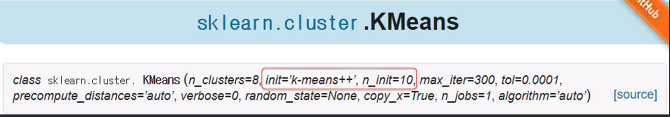

In [ ]:
# 타이타닉에서 Survived 제외
# X값으로 군집화 Kmeans
# 최적의 군집 개수는? 실루엣스코어
# 임의로 2개의 군집, Survived 비교

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

df_test.Cabin.astype(str)

# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_test.Cabin.fillna('N', inplace=True)
df_test.Fare.fillna(df1.Fare.median(), inplace=True)
df_test.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_test.Cabin = df_test.Cabin.apply(lambda x:x[0])

# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
og_columns

for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_test[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_test[i] = globals()[f'df_kg_{i}_encoder'].transform(df_test[i])

# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6,
            init='k-means++',
            n_init=10,
            max_iter=100,
            tol=0.0001,
            verbose=3,
            random_state=0,
            algorithm='elkan')
km_pred = km.fit_predict(X)
km_pred

Initialization complete
Iteration 0, inertia 4591241.775896472
Iteration 1, inertia 2871730.13382094
Iteration 2, inertia 2778399.969652813
Iteration 3, inertia 2745072.6258684164
Iteration 4, inertia 2716187.475133338
Iteration 5, inertia 2688295.138618011
Iteration 6, inertia 2670436.4493020577
Iteration 7, inertia 2646333.794083395
Iteration 8, inertia 2606679.1166619733
Iteration 9, inertia 2583679.2692321017
Iteration 10, inertia 2566626.4001717754
Iteration 11, inertia 2556419.5651683207
Iteration 12, inertia 2544979.6130569666
Iteration 13, inertia 2530254.8667655787
Iteration 14, inertia 2525147.776836884
Iteration 15, inertia 2521084.3097359333
Iteration 16, inertia 2517896.036480294
Iteration 17, inertia 2515904.663080428
Iteration 18, inertia 2514924.7628072593
Iteration 19, inertia 2514664.017015472
Iteration 20, inertia 2514348.7664346136
Iteration 21, inertia 2514072.9705825374
Iteration 22, inertia 2513681.9958788934
Converged at iteration 22: center shift 0.347702852902

array([0, 3, 3, 1, 0, 4, 1, 4, 4, 2, 3, 1, 0, 4, 0, 2, 0, 2, 4, 2, 2, 2,
       4, 1, 4, 4, 2, 1, 4, 4, 3, 3, 4, 3, 3, 1, 2, 0, 4, 2, 0, 1, 4, 3,
       4, 3, 0, 1, 2, 4, 2, 0, 3, 2, 1, 1, 3, 2, 3, 3, 2, 1, 0, 4, 3, 2,
       3, 3, 2, 4, 3, 3, 3, 2, 1, 4, 4, 0, 2, 0, 4, 4, 4, 1, 3, 2, 3, 3,
       1, 4, 4, 4, 3, 3, 0, 0, 3, 3, 1, 2, 4, 4, 0, 0, 2, 4, 4, 2, 4, 0,
       1, 2, 4, 0, 2, 3, 0, 1, 5, 4, 3, 3, 2, 2, 0, 2, 0, 3, 2, 4, 4, 3,
       0, 1, 3, 3, 1, 1, 0, 3, 2, 4, 3, 0, 2, 3, 0, 3, 1, 2, 3, 1, 0, 3,
       3, 3, 0, 3, 2, 3, 0, 3, 4, 4, 2, 0, 1, 4, 3, 1, 1, 0, 4, 3, 1, 0,
       0, 3, 2, 3, 3, 3, 4, 1, 4, 1, 0, 1, 0, 4, 2, 2, 0, 1, 3, 3, 0, 0,
       0, 2, 4, 3, 2, 2, 0, 4, 2, 2, 0, 1, 3, 3, 0, 2, 0, 0, 3, 2, 1, 3,
       3, 1, 1, 4, 1, 3, 3, 0, 2, 0, 0, 4, 2, 4, 3, 3, 2, 3, 2, 3, 2, 0,
       3, 3, 2, 1, 4, 2, 1, 2, 0, 4, 1, 0, 0, 2, 3, 1, 5, 1, 0, 4, 1, 1,
       0, 3, 2, 4, 3, 3, 1, 3, 2, 3, 0, 1, 4, 2, 0, 3, 4, 4, 4, 0, 1, 4,
       4, 4, 2, 0, 1, 1, 3, 4, 4, 3, 2, 1, 1, 5, 0,

In [ ]:
km.cluster_centers_

array([[2.81065089e+00, 6.98224852e-01, 2.91923077e+01, 4.26035503e-01,
        2.18934911e-01, 4.67088757e+02, 1.80639071e+01, 6.59763314e+00,
        1.62721893e+00],
       [1.30635838e+00, 5.72254335e-01, 3.44330636e+01, 4.21965318e-01,
        3.75722543e-01, 6.16473988e+01, 5.94599705e+01, 3.65895954e+00,
        1.56069364e+00],
       [2.43406593e+00, 6.31868132e-01, 2.72733516e+01, 5.05494505e-01,
        3.73626374e-01, 1.90203297e+02, 1.57943698e+01, 6.87912088e+00,
        1.33516484e+00],
       [2.16145833e+00, 6.56250000e-01, 3.01328125e+01, 7.50000000e-01,
        4.79166667e-01, 6.05385417e+02, 3.54848083e+01, 5.94791667e+00,
        1.47916667e+00],
       [2.98159509e+00, 6.99386503e-01, 2.54509202e+01, 4.90797546e-01,
        4.35582822e-01, 3.31006135e+02, 1.21365472e+01, 6.88957055e+00,
        1.80981595e+00],
       [1.00000000e+00, 4.16666667e-01, 3.10833333e+01, 4.16666667e-01,
        5.83333333e-01, 6.01750000e+02, 3.07388200e+02, 2.75000000e+00,
        1.6

In [ ]:
# silhouette_score가 높을 수록 좋은 군집의 수
from sklearn.metrics import silhouette_score
silhouette_score(X, km_pred)

0.4810071654500419

In [ ]:
# ineritia가 낮을 수록 좋은 군집의 수 (기울기를 확인해야 함)
km.inertia_

2488101.055589532

In [ ]:
X_new = X.copy()
X_new.cluster = km.labels_
X_new

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,1,22.0,1,0,523,7.2500,7,2
2,1,0,38.0,1,0,596,71.2833,2,0
3,3,0,26.0,0,0,669,7.9250,7,2
4,1,0,35.0,1,0,49,53.1000,2,2
5,3,1,35.0,0,0,472,8.0500,7,2
...,...,...,...,...,...,...,...,...,...
887,2,1,27.0,0,0,101,13.0000,7,2
888,1,0,19.0,0,0,14,30.0000,1,2
889,3,0,28.0,1,2,675,23.4500,7,2


In [ ]:
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300, param_tol=0.0002):
    clusters_range = range(2,15)
    results = []
    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0, tol=param_tol)
        cluster_labels = clusterer.fit_predict(data)
        silhouette = silhouette_score(data, cluster_labels)
        results.append((i, silhouette))
    results.sort(key= lambda x: x[1], reverse=True)
    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    plt.figure(figsize=(10,5))
    sns.barplot(x=result.n_clusters, y=result.silhouette_score)
    plt.tight_layout()
    plt.show()

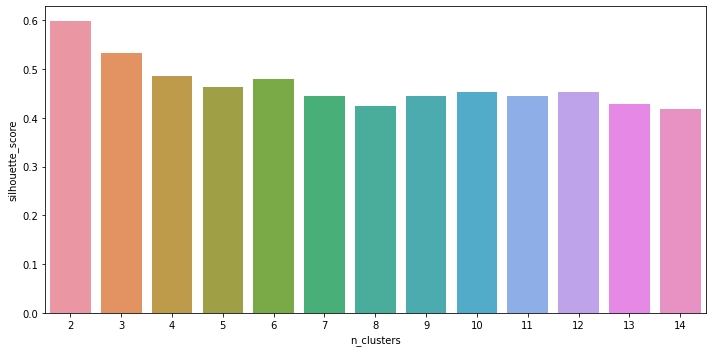

In [ ]:
visualize_silhouette_layer(X, param_init='random', param_n_init=10, param_max_iter=300)

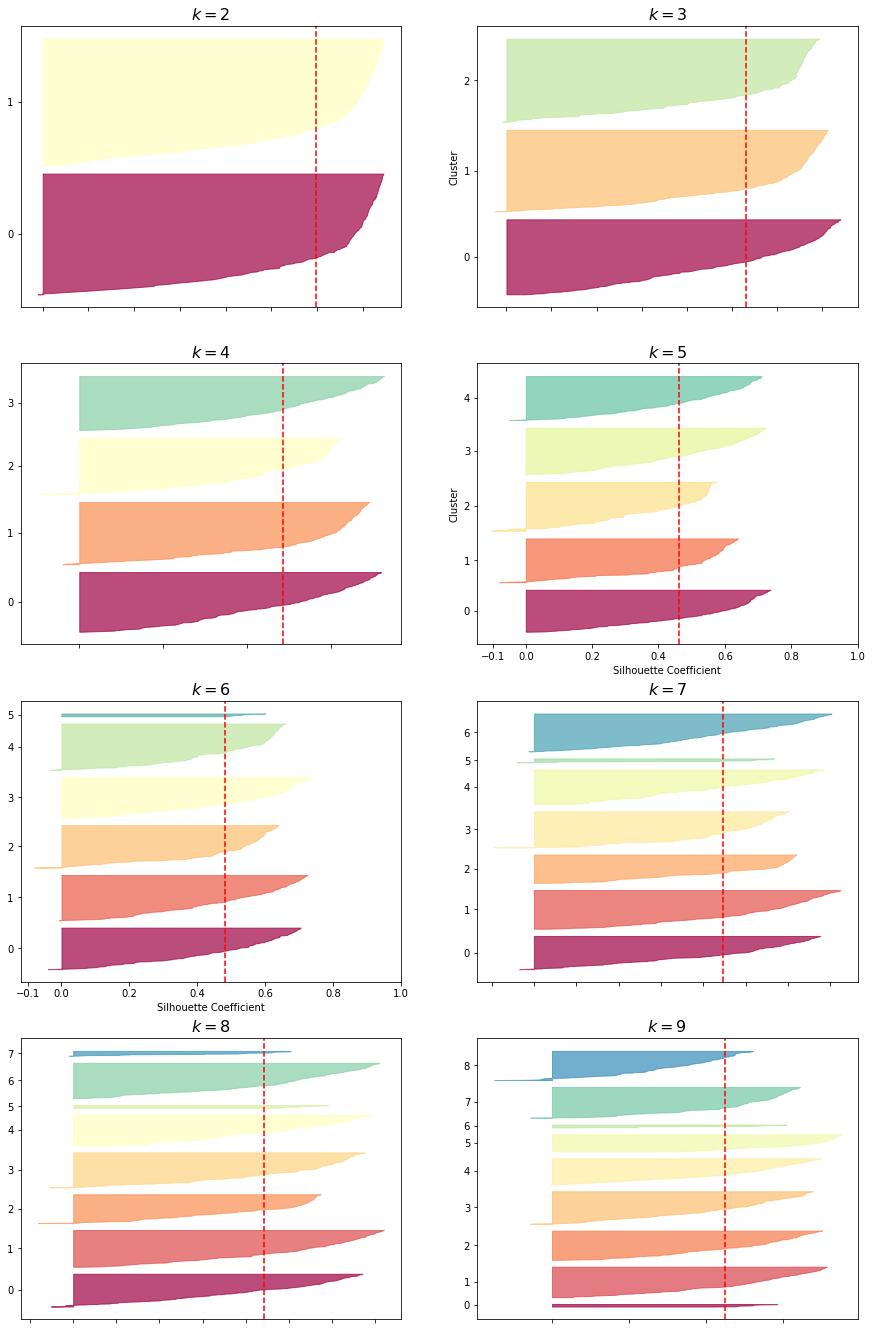

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
kmeans_per_k = [KMeans(n_clusters=k, random_state=19).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(15, 30))
for k in range(2, 10):
    plt.subplot(5, 2, k-1)
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel('Cluster')
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouette_scores[k - 2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)
#save_fig('silhouette_analysis_plot')
plt.show()

### 군집을 사용한 준지도 학습 

* 레이블이 없는 샘플이 많고 레이블이 있는 샘플이 적을 때 
* 타이타닉 학습 데이터의 개수를 50개로 제한
* 나머지 학습데이터의 레이블 삭제
* 전체 학습 데이터 세트를 kmeans로 20개의 군집화 진행
* 각 센트로이드에서 가장 가까운

In [ ]:
perfect = pd.read_csv('/content/drive/MyDrive/titanic_100.csv')
perfect = perfect.Survived

In [ ]:
# without clustering
X1 = X[:50]
y1 = y[:50]

rf_clf = RandomForestClassifier()
rf_clf.fit(X1, y1)
rf_clf.score(df_test, perfect)

0.7033492822966507

In [ ]:
# with clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=550,
            init='k-means++',
            n_init=10,
            random_state=0,
            algorithm='elkan')
X_semi = km.fit_transform(X)
representative_idx = np.argmin(X_semi, axis=0)
X_semi_trn = X.loc[representative_idx]
y_semi_trn = y.loc[representative_idx]

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_semi_trn, y_semi_trn)
rf_clf.score(df_test, perfect)

0.7703349282296651